In [77]:
from influxdb import InfluxDBClient
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.style.use('ggplot')
from pandas import read_csv

In [2]:
folderNames = ['s1t1rc1nc1t2xlargecomputeprimeappt2mediumpdi',
               's1t1rc1nc1t2xlargecomputeprimeappt2largescn', 
              ]

host = '10.155.208.224'
port = 8086
username= 'root'
password = 'root'
appnames  = ["primeapp"]


In [3]:
def getAllNodeNames(client):
    queryResult = client.query("SHOW TAG VALUES FROM uptime WITH KEY=nodename;")
    nodeNames_temp = list(queryResult.get_points())
    dfnodeNames = pd.DataFrame(nodeNames_temp)
    allNodeNames = dfnodeNames[:]["value"]
    return allNodeNames
def getNamespaceNames(client,node):
    nsQuery = client.query("SHOW TAG VALUES FROM uptime WITH KEY=namespace_name WHERE nodename = '"+node+"';")
    nsQuery_temp = list(nsQuery.get_points())
    dfnsNames = pd.DataFrame(nsQuery_temp)
    allnsNames = dfnsNames[:]["value"]
    return allnsNames
def getAllPodNames(client,node,ns_name):
    queryResult = client.query("SHOW TAG VALUES FROM uptime WITH KEY = pod_name WHERE namespace_name = '"+ns_name+"' AND nodename = '"+node+"';")
    podNames_temp = list(queryResult.get_points())
    dfpodNames = pd.DataFrame(podNames_temp)
    if dfpodNames.empty: 
        return dfpodNames
    else:
        allpodNames = dfpodNames[:]["value"]
        return allpodNames
def getCPUUtilizationNode(client, node):
    queryResult = client.query('SELECT * FROM "cpu/node_utilization" where nodename = \''+node+'\' AND type=\'node\';')
    dfcpuUtilization = pd.DataFrame(queryResult['cpu/node_utilization'])
    return dfcpuUtilization
def getCPUUtilizationPod(client, node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "cpu/usage_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfcpuUtilization = pd.DataFrame(queryResult['cpu/usage_rate'])
    return dfcpuUtilization
def getCPUUtilizationPodContainer(client,node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "cpu/usage_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\' AND type=\'pod_container\';')
    dfcpuUtilization = pd.DataFrame(queryResult['cpu/usage_rate'])
    return dfcpuUtilization
def prepareCpuUtilization(client,node,ns_name, pod_name):
    cpuUtilization = getCPUUtilizationNode(client,node)
    podCpuUtilization = getCPUUtilizationPod(client,node,ns_name, pod_name)
    containercpuUtilization = getCPUUtilizationPodContainer(client,node,ns_name, pod_name)
    plt.plot(cpuUtilization.index, cpuUtilization['value'] *1000, 'r', label="node") # plotting t, a separately 
    plt.plot(podCpuUtilization.index, podCpuUtilization['value'], 'b', label="pod") # plotting t, b separately 
    plt.plot(containercpuUtilization.index, containercpuUtilization['value'], 'g', label="container") # plotting t, c separately
    plt.legend(loc='upper left')
    plt.show()
def getMemoryUtilizationNode(client,node):
    queryResult = client.query('SELECT * FROM "memory/node_utilization" where nodename = \''+node+'\' AND type=\'node\';')
    dfmemUtilization = pd.DataFrame(queryResult['memory/node_utilization'])
    return dfmemUtilization
def getMemoryUtilizationPod(client,node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "memory/usage" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['memory/usage'])
    return dfmemUtilization
def getMemoryUtilizationPodContainer(client,node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "memory/usage" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\' AND type=\'pod_container\';')
    dfmemUtilization = pd.DataFrame(queryResult['memory/usage'])
    return dfmemUtilization
def prepareMemoryUtilization(client,node,ns_name, pod_name):
    memoryUtilization = getMemoryUtilizationNode(client,node)
    podMemoryUtilization = getMemoryUtilizationPod(client,node,ns_name, pod_name)
    containerMemoryUtilization = getMemoryUtilizationPodContainer(client,node,ns_name, pod_name)
    plt.plot(memoryUtilization.index, memoryUtilization['value'], 'r', label="node") # plotting t, a separately 
    plt.plot(podMemoryUtilization.index, podMemoryUtilization['value'], 'b', label="pod") # plotting t, b separately 
    plt.plot(containerMemoryUtilization.index, containerMemoryUtilization['value'], 'g', label="container") # plotting t, c separately 
    plt.legend(loc='upper left')
    plt.show()
def getNetworkTxRatePod(client,node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/tx_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/tx_rate'])
    return dfmemUtilization
def getNetworkTxPod(client,node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/tx" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/tx'])
    return dfmemUtilization
def getNetworkTxErrorsPod(client,node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/tx_errors" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/tx_errors'])
    return dfmemUtilization
def getNetworkTxErrorsRatePod(client,node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/tx_errors_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/tx_errors_rate'])
    return dfmemUtilization
def prepareNetworkTxRateUtilization(client,node,ns_name, pod_name):
    podNetworTxRate = getNetworkTxRatePod(client,node,ns_name, pod_name)
    podNetworTx = getNetworkTxPod(client,node,ns_name, pod_name)
    podNetworkError = getNetworkTxErrorsPod(client,node,ns_name, pod_name)
    podNetworkErrorRate = getNetworkTxErrorsRatePod(client,node,ns_name, pod_name)
    plt.plot(podNetworTxRate.index, podNetworTxRate['value'], 'b') # plotting t, b separately 
    #plt.plot(podNetworTx.index, podNetworTx['value'], 'g') # plotting t, b separately 
    #plt.plot(podNetworkError.index, podNetworkError['value'], 'y') # plotting t, b separately 
    plt.plot(podNetworkErrorRate.index, podNetworkErrorRate['value'], 'r') # plotting t, b separately 
    plt.show()
def getNetworkRxRatePod(client,node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/rx_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/rx_rate'])
    return dfmemUtilization
def getNetworkRxPod(client,node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/rx" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/rx'])
    return dfmemUtilization

def getNetworkRxErrorsPod(client,node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/rx_errors" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/rx_errors'])
    return dfmemUtilization
def getNetworkRxErrorsRatePod(client,node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/rx_errors_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/rx_errors_rate'])
    return dfmemUtilization
def prepareNetworkRxRateUtilization(client,node,ns_name, pod_name):
    podNetworRxRate = getNetworkRxRatePod(client,node,ns_name, pod_name)
    podNetworRx = getNetworkRxPod(client,node,ns_name, pod_name)
    podNetworkError = getNetworkRxErrorsPod(client,node,ns_name, pod_name)
    podNetworkErrorRate = getNetworkRxErrorsRatePod(client,node,ns_name, pod_name)
    plt.plot(podNetworRxRate.index, podNetworRxRate['value'], 'b') # plotting t, b separately 
    #plt.plot(podNetworRx.index, podNetworRx['value'], 'g') # plotting t, b separately 
    #plt.plot(podNetworkError.index, podNetworkError['value'], 'y') # plotting t, b separately 
    plt.plot(podNetworkErrorRate.index, podNetworkErrorRate['value'], 'r') # plotting t, b separately 
    plt.show()
def getRelevantNodeName(client,ns_name):
    allNodeNames  = getAllNodeNames(client)
    #nsNames = getNamespaceNames(allNodeNames[0])
    for node in allNodeNames:
        allPodNamesNode = getAllPodNames(client,node,ns_name)
        if(not allPodNamesNode.empty):
            return node

def getNodeResourceUtilizationDf(client, nodeName):
    Result_node_CPU = client.query("SELECT value from \"cpu/node_utilization\" where nodename = '"+nodeName+"' AND type = 'node' ")
    Result_node_MEM = client.query("SELECT value from \"memory/node_utilization\" where nodename = '"+nodeName+"' AND type = 'node' ")

    Result_node_CPU_Cores = client.query("SELECT mean(\"value\") FROM \"cpu/node_capacity\" where nodename = '"+nodeName+
                                         "' AND type = 'node' GROUP BY time(1m)")
    Result_node_mem_node = client.query("SELECT mean(\"value\")FROM \"memory/node_capacity\" where nodename = '"+
                                        nodeName+"' AND type = 'node' GROUP BY time(1m)")
    
    cpu_points = pd.DataFrame(Result_node_CPU.get_points())
    cpu_points['time'] = pd.to_datetime(cpu_points['time'])
    cpu_points = cpu_points.set_index('time')
    cpu_points.columns = ['node_cpu_util']
    mem_points = pd.DataFrame(Result_node_MEM.get_points())
    mem_points['time'] = pd.to_datetime(mem_points['time'])
    mem_points = mem_points.set_index('time')
    mem_points.columns = ['node_mem_util']
    
    cores_points = pd.DataFrame(Result_node_CPU_Cores.get_points())
    cores_points['time'] = pd.to_datetime(cores_points['time'])
    cores_points = cores_points.set_index('time')
    cores_points.columns = ['node_cores']
    
    mem_node_points = pd.DataFrame(Result_node_mem_node.get_points())
    mem_node_points['time'] = pd.to_datetime(mem_node_points['time'])
    mem_node_points = mem_node_points.set_index('time')
    mem_node_points.columns = ['node_mem']
    
    df_node =pd.concat([cpu_points, mem_points,cores_points,mem_node_points], axis=1)
    return df_node
def getPodResourceUtilizationDf(client, node, ns_name, pod_name):
    Result_Pod_CPU_usage = client.query('SELECT value FROM "cpu/usage_rate" where nodename = \''+node+
                                        '\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+
                                        '\'  AND type=\'pod\';')
    Result_Pod_MEM_usage = client.query('SELECT value from \"memory/usage\" where nodename = \''+node+
                                        '\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+
                                        '\'  AND type=\'pod\';')
    
    Result_Pod_CPU_limit = client.query('SELECT mean(\"value\") FROM "cpu/limit" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\' group by time(1m);')
    Result_Pod_MEM_limit = client.query('SELECT mean(\"value\") from \"memory/limit\" where nodename = \''+node+
                                        '\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+
                                        '\'  AND type=\'pod\' group by time(1m);')
    
    Result_Pod_CPU_requests = client.query('SELECT mean(\"value\") FROM "cpu/request" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\' group by time(1m);')
    Result_Pod_MEM_requests = client.query('SELECT mean(\"value\") from \"memory/request\" where nodename = \''+node+
                                           '\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+
                                           '\'  AND type=\'pod\' group by time(1m);')
    
    
    cpu_points_usage = pd.DataFrame(Result_Pod_CPU_usage.get_points())
    cpu_points_usage['time'] = pd.to_datetime(cpu_points_usage['time'])
    cpu_points_usage = cpu_points_usage.set_index('time')
    cpu_points_usage.columns = ['pod_cpu_usage']
    
    
    mem_points_usage = pd.DataFrame(Result_Pod_MEM_usage.get_points())
    mem_points_usage['time'] = pd.to_datetime(mem_points_usage['time'])
    mem_points_usage = mem_points_usage.set_index('time')
    mem_points_usage.columns = ['pod_mem_usage']
    
     
    cpu_points_limits = pd.DataFrame(Result_Pod_CPU_limit.get_points())
    cpu_points_limits['time'] = pd.to_datetime(cpu_points_limits['time'])
    cpu_points_limits = cpu_points_limits.set_index('time')
    cpu_points_limits.columns = ['pod_cpu_limit']
    
    
    mem_points_limits = pd.DataFrame(Result_Pod_MEM_limit.get_points())
    mem_points_limits['time'] = pd.to_datetime(mem_points_limits['time'])
    mem_points_limits = mem_points_limits.set_index('time')
    mem_points_limits.columns = ['pod_mem_limit']
    
     
    cpu_points_request = pd.DataFrame(Result_Pod_CPU_requests.get_points())
    cpu_points_request['time'] = pd.to_datetime(cpu_points_request['time'])
    cpu_points_request = cpu_points_request.set_index('time')
    cpu_points_request.columns = ['pod_cpu_request']
    
    
    mem_points_request = pd.DataFrame(Result_Pod_MEM_requests.get_points())
    mem_points_request['time'] = pd.to_datetime(mem_points_request['time'])
    mem_points_request = mem_points_request.set_index('time')
    mem_points_request.columns = ['pod_mem_request']
       
    df_pod =pd.concat([cpu_points_usage, mem_points_usage,cpu_points_limits,mem_points_limits,cpu_points_request,mem_points_request ], axis=1)
    
    return df_pod
def getRequestsDf(clientK6):
    queryResult = clientK6.query('SELECT sum("value") FROM "vus" group by time(1m);')
    vus = pd.DataFrame(queryResult['vus'])
    vus.columns = ['vus','time']
    vus = vus.set_index('time')


    queryResultReqs = clientK6.query('SELECT sum("value") FROM "http_reqs" group by time(1m);')
    reqs = pd.DataFrame(queryResultReqs['http_reqs'])
    reqs.columns = ['requests','time']
    reqs = reqs.set_index('time')
    queryResultReqsDuration95 = clientK6.query('SELECT percentile("value", 95) FROM "http_req_duration" group by time(1m) ;')
    reqs_duration95 = pd.DataFrame(queryResultReqsDuration95['http_req_duration'])
    reqs_duration95.columns = [ 'requests_duration_percentile_95','time']
    reqs_duration95 = reqs_duration95.set_index('time')
    queryResultReqsDuration90 = clientK6.query('SELECT percentile("value", 90) FROM "http_req_duration" group by time(1m) ;')
    reqs_duration90 = pd.DataFrame(queryResultReqsDuration90['http_req_duration'])
    reqs_duration90.columns = ['requests_duration_percentile_90','time']
    reqs_duration90 = reqs_duration90.set_index('time')

    queryResultMaxDuration = clientK6.query('SELECT max("value") FROM "http_req_duration" group by time(1m);')
    reqs_duration_max = pd.DataFrame(queryResultMaxDuration['http_req_duration'])
    reqs_duration_max.columns = ['requests_duration_max','time']
    reqs_duration_max = reqs_duration_max.set_index('time')

    queryResultMinDuration = clientK6.query('SELECT min("value") FROM "http_req_duration" group by time(1m);')
    reqs_duration_min = pd.DataFrame(queryResultMinDuration['http_req_duration'])
    reqs_duration_min.columns = ['requests_duration_min','time']
    reqs_duration_min = reqs_duration_min.set_index('time')

    queryResultMeanDuration = clientK6.query('SELECT mean("value") FROM "http_req_duration" group by time(1m);')
    reqs_duration_mean = pd.DataFrame(queryResultMeanDuration['http_req_duration'])
    reqs_duration_mean.columns = ['requests_duration_mean','time']
    reqs_duration_mean = reqs_duration_mean.set_index('time')

    queryResultMedianDuration = clientK6.query('SELECT median("value") FROM "http_req_duration" group by time(1m);')
    reqs_duration_median = pd.DataFrame(queryResultMedianDuration['http_req_duration'])
    reqs_duration_median.columns = ['requests_duration_median','time']
    reqs_duration_median = reqs_duration_median.set_index('time')

    finalDF = pd.merge(vus, reqs, left_index=True, right_index=True)
    finalDF = pd.merge(finalDF, reqs_duration95, left_index=True, right_index=True)
    finalDF = pd.merge(finalDF, reqs_duration90, left_index=True, right_index=True)
    finalDF = pd.merge(finalDF,reqs_duration_max, left_index=True, right_index=True)
    finalDF = pd.merge(finalDF,reqs_duration_min, left_index=True, right_index=True)
    finalDF = pd.merge(finalDF,reqs_duration_mean, left_index=True, right_index=True)
    finalDF = pd.merge(finalDF,reqs_duration_median, left_index=True, right_index=True)
    finalDF.index = pd.to_datetime(finalDF.index)

    return finalDF

def getPodsNodesRequestsDf(client, clientK6):
    default_ns_name =  "default"
    relevantNodeName = getRelevantNodeName(client,default_ns_name)
    podNames = getAllPodNames(client,relevantNodeName, default_ns_name)
    df_node = getNodeResourceUtilizationDf(client,relevantNodeName)
    df_pods_node = []
    for podName in podNames: 
        if appnames[0] in podName: 
            df_pod = getPodResourceUtilizationDf(client,relevantNodeName, default_ns_name, podName)
            finalDF = pd.merge(df_node,df_pod, left_index=True, right_index=True)
            requestsDF = getRequestsDf(clientK6)
            finalDF = pd.merge(finalDF,requestsDF, left_index=True, right_index=True)
            finalDF['pod_cpu_usage'] = finalDF['pod_cpu_usage']/(finalDF['pod_cpu_limit'])
            finalDF['pod_cpu_limit'] = finalDF['pod_cpu_limit']/1000
            finalDF['pod_cpu_request'] = finalDF['pod_cpu_request']/1000

            finalDF['pod_mem_usage'] = finalDF['pod_mem_usage']/(finalDF['pod_mem_limit'])
            finalDF['pod_mem_limit'] = finalDF['pod_mem_limit']/(1073741824)
            finalDF['pod_mem_request'] = finalDF['pod_mem_request']/(1073741824)

            finalDF['node_cores'] = finalDF['node_cores']/1000
            finalDF['node_mem'] = finalDF['node_mem']/(1073741824)

            finalDF = finalDF.fillna(0)
            finalDF = finalDF[(finalDF.T != 0).any()]
            df_pods_node.append(finalDF)
    return df_pods_node
import numpy as np
def reject_outliers(data, m = 2):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

In [4]:
allFinalDFs = []
for folderName in folderNames:
    client = InfluxDBClient(host, port,username , password, folderName+'_k8s')
    clientK6 = InfluxDBClient(host, port, username, password, folderName+'_TestK6')
    df_pods_node = getPodsNodesRequestsDf(client, clientK6)
    print(folderName)
    finalDF = pd.DataFrame()
    for i in range(len(df_pods_node)):
        df_pods_node[i] = df_pods_node[i].reset_index(drop=True)
        finalDF['pod'+str(i+1)+'_cpu_usage'] = df_pods_node[i]['pod_cpu_usage']
        finalDF['pod'+str(i+1)+'_mem_usage'] = df_pods_node[i]['pod_mem_usage']
    finalDF['num_pods'] = int(len(df_pods_node))
    finalDF = pd.concat([finalDF, df_pods_node[0][['node_cores', 'node_mem','node_cpu_util','node_mem_util', 'pod_cpu_limit', 'pod_cpu_request','pod_mem_limit',
                                                   'pod_mem_request','vus','requests','requests_duration_percentile_95',
                                                  'requests_duration_percentile_90','requests_duration_max', 'requests_duration_min',
                                                   'requests_duration_mean', 'requests_duration_median'
                                                  ]]], axis=1)
    
    allFinalDFs.append(finalDF)

s1t1rc1nc1t2xlargecomputeprimeappt2mediumpdi
s1t1rc1nc1t2xlargecomputeprimeappt2largescn


In [5]:
df = pd.DataFrame()
for idx in range(len(folderNames)):
    df = df.append(allFinalDFs[idx])



In [6]:
df.head()

,pod1_cpu_usage,pod1_mem_usage,num_pods,node_cores,node_mem,node_cpu_util,node_mem_util,pod_cpu_limit,pod_cpu_request,pod_mem_limit,pod_mem_request,vus,requests,requests_duration_percentile_95,requests_duration_percentile_90,requests_duration_max,requests_duration_min,requests_duration_mean,requests_duration_median
0,0.0000,0.003751,1,4.0,15.674213,0.00975,0.167898,2.0,2.0,3.90625,3.90625,8.0,9.0,27.680330,27.253428,27.680330,13.577353,17.968871,14.385384
1,0.0000,0.003774,1,4.0,15.674213,0.01025,0.168071,2.0,2.0,3.90625,3.90625,53.0,51.0,21.601111,18.643291,22.588567,12.687695,14.856631,13.862593
2,0.0070,0.007515,1,4.0,15.674213,0.01375,0.169207,2.0,2.0,3.90625,3.90625,265.0,268.0,21.732819,21.044662,24.085672,12.306026,15.097047,13.478307
3,0.0235,0.010575,1,4.0,15.674213,0.02500,0.169677,2.0,2.0,3.90625,3.90625,382.0,378.0,21.439515,20.919577,41.666549,11.854600,15.025702,13.063574
4,0.0365,0.011487,1,4.0,15.674213,0.03275,0.169162,2.0,2.0,3.90625,3.90625,506.0,495.0,21.150088,20.581392,22.407364,11.782292,14.463437,12.878387


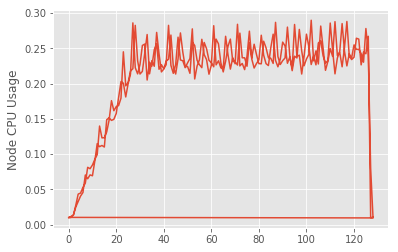

In [7]:
plt.plot(df['node_cpu_util'])
plt.ylabel("Node CPU Usage")
plt.grid(True)
plt.show()

In [8]:
df = df.fillna(0)


In [9]:
dftemp_cpu = df[['requests','num_pods','node_cores', 'node_cpu_util','pod_cpu_limit','pod_mem_limit','node_mem_util','requests_duration_mean']]
dftemp_cpu['pod_util_cpu_avg'] = df['pod1_cpu_usage']#+df['pod2_cpu_usage']+df['pod3_cpu_usage']
dftemp_cpu['pod_util_cpu_avg'] = dftemp_cpu['pod_util_cpu_avg']/dftemp_cpu['num_pods']
dftemp_cpu['pod_util_mem_avg'] = df['pod1_mem_usage']#+df['pod2_mem_usage']+df['pod3_mem_usage']
dftemp_cpu['pod_util_mem_avg'] = dftemp_cpu['pod_util_mem_avg']/dftemp_cpu['num_pods']
#dftemp_mem = df[['requests', 'node_cores','node_mem', 'node_mem_util','pod_cpu_limit','pod_cpu_request','pod_mem_usage','pod_mem_limit','pod_mem_request', 'requests_duration_mean', 'requests_duration_percentile_95']]


C:\Users\ansjin\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ansjin\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ansjin\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [10]:
dftemp_cpu.head()

,requests,num_pods,node_cores,node_cpu_util,pod_cpu_limit,pod_mem_limit,node_mem_util,requests_duration_mean,pod_util_cpu_avg,pod_util_mem_avg
0,9.0,1,4.0,0.00975,2.0,3.90625,0.167898,17.968871,0.0000,0.003751
1,51.0,1,4.0,0.01025,2.0,3.90625,0.168071,14.856631,0.0000,0.003774
2,268.0,1,4.0,0.01375,2.0,3.90625,0.169207,15.097047,0.0070,0.007515
3,378.0,1,4.0,0.02500,2.0,3.90625,0.169677,15.025702,0.0235,0.010575
4,495.0,1,4.0,0.03275,2.0,3.90625,0.169162,14.463437,0.0365,0.011487


In [11]:
final_df  = dftemp_cpu[['requests','requests_duration_mean','num_pods','pod_cpu_limit','pod_mem_limit','pod_util_cpu_avg','pod_util_mem_avg',]]
final_df['pod_util_cpu_avg'] = final_df['pod_util_cpu_avg']*final_df['pod_cpu_limit']
final_df['pod_util_mem_avg'] = final_df['pod_util_mem_avg']*final_df['pod_mem_limit']
final_df = final_df.sort_values(['requests'])


C:\Users\ansjin\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ansjin\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
final_df = final_df[(final_df[['pod_util_cpu_avg','pod_util_mem_avg','requests_duration_mean']] != 0).all(axis=1)]
final_df = final_df[np.isfinite(final_df['requests'])]
final_df = final_df[np.isfinite(final_df['requests_duration_mean'])]
final_df = final_df[np.isfinite(final_df['pod_util_cpu_avg'])]
final_df = final_df[np.isfinite(final_df['pod_util_mem_avg'])]
final_df = final_df[final_df.requests_duration_mean < 2500]
final_df = final_df.reset_index(drop=True)

In [13]:
final_df.to_csv('primeapp_test1.csv')
#dataset = read_csv('instanatest.csv', header=0, index_col=0)

In [14]:
final_df.head()

,requests,requests_duration_mean,num_pods,pod_cpu_limit,pod_mem_limit,pod_util_cpu_avg,pod_util_mem_avg
0,92.0,16.554491,1,2.0,7.81250,0.003,0.022514
1,241.0,16.120478,1,2.0,7.81250,0.012,0.013981
2,268.0,15.097047,1,2.0,3.90625,0.014,0.029354
3,378.0,15.025702,1,2.0,3.90625,0.047,0.041309
4,495.0,14.463437,1,2.0,3.90625,0.073,0.044872


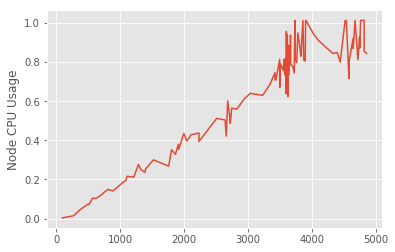

In [15]:
plt.plot( final_df['requests'], final_df['pod_util_cpu_avg'])
plt.ylabel("Node CPU Usage")
plt.grid(True)
plt.show()

In [16]:
import seaborn as sb

# Linear Regression

In [17]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [18]:
# Use only one feature
final_df = final_df.sort_values(['pod_util_cpu_avg'])
df_X = final_df[['requests', 'requests_duration_mean', 'num_pods' ]].values
df_Y = final_df[['pod_util_cpu_avg']].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.33, random_state=42)

In [20]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
# Create linear regression object
#regr = linear_model.LinearRegression()
#regr = Pipeline([
#                  ('linear', linear_model.LinearRegression(fit_intercept=False))])
#regr = linear_model.Ridge (alpha = .01)
#regr = linear_model.Lasso(alpha = 0.1)
#regr = linear_model.LassoLars(alpha=.1)
regr2 = make_pipeline(PolynomialFeatures(3), Ridge())

# Train the model using the training sets
regr2.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr2.predict(X_test)

# The coefficients

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print ('Model score %.2f' %  regr2.score(X_test, y_test) )
#print ('Test score %.2f', regr.score(X_test, y_test) )
print("Train Mean squared error: %.2f"
      % mean_squared_error(y_train, regr2.predict(X_train)))


Mean squared error: 0.00
Variance score: 0.94
Model score 0.94
Train Mean squared error: 0.00


C:\Users\ansjin\Anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.5464268841246313e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

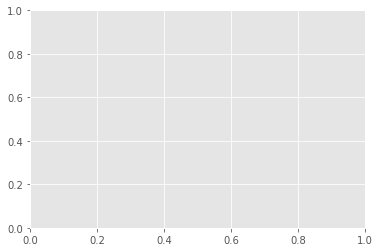

In [21]:
# Plot outputs
plt.scatter(X_train[:,0], y_train,  '-b',label="actual_CPU_utilization")
plt.plot(y_pred,'r', label="predicted_CPU_utilization")
#plt.plot(X_test[:,0], y_pred, color='blue')

plt.legend(loc='upper left')
plt.show()

In [22]:
#y_test = y_test.reset_index(drop=True)
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMs score: %.2f' % rms)

RMs score: 0.06


In [23]:
regr2.predict([[22000, 1000, 3]])

array([[ 15.34108942]])

import numpy as np
dftemp_cpu = dftemp_cpu.replace([np.inf, -np.inf], np.nan)
dftemp_cpu = dftemp_cpu.fillna(0)
np.all(np.isfinite(dftemp_cpu))


In [24]:
final_df = final_df.sort_values(['requests'])
df_X = final_df[['pod_util_cpu_avg', 'requests_duration_mean' ]].values
df_Y = final_df[['requests']].values


In [25]:
df_X.shape

(129, 2)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.33, random_state=42)


In [72]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Create linear regression object
#regr = linear_model.LinearRegression()
regr = Pipeline([
                  ('linear', linear_model.LinearRegression(fit_intercept=False))])
#regr = linear_model.Ridge (alpha = .01)
#regr = linear_model.Lasso(alpha = 0.1)
#regr = linear_model.LassoLars(alpha=.1)
#regr = make_pipeline(PolynomialFeatures(2), Ridge())
polybig_features = PolynomialFeatures(degree=1, include_bias=False)
std_scaler = StandardScaler()
lin_reg = linear_model.LinearRegression()
regr = Pipeline([
                ("poly_features", polybig_features),
                ("std_scaler", std_scaler),
                ("lin_reg", lin_reg),
            ])
# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print ('Model score %.2f' %  regr.score(X_test, y_test) )
#print ('Test score %.2f', regr.score(X_test, y_test) )
print("Train Mean squared error: %.2f"
      % mean_squared_error(y_train, regr.predict(X_train)))

Mean squared error: 99109.31
Variance score: 0.93
Model score 0.93
Train Mean squared error: 116483.82


In [73]:
#y_test = y_test.reset_index(drop=True)
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMs score: %.2f' % rms)

RMs score: 314.82


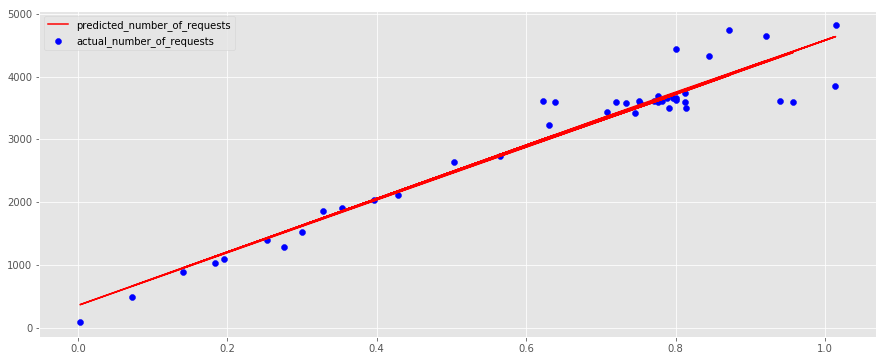

In [78]:
# Plot outputs
plt.scatter(X_test[:,0],  y_test,  color='blue',label="actual_number_of_requests")
#plt.plot(X_test[:,0], y_pred, color='blue')
plt.plot(X_test[:,0], y_pred,'-r',label="predicted_number_of_requests")
plt.legend(loc='upper left')
plt.show()

['pod_util_cpu_avg','requests_duration_mean', 'num_pods', 'pod_cpu_limit', 'pod_mem_limit']

In [76]:
regr.predict([[1,1000]])

array([[ 4591.90760572]])